In [41]:
#import the dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [42]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [43]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [44]:
from citipy import citipy

In [45]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [46]:
import requests

# Import the API key.
from config import weather_api_key

In [47]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f423c52d82dce95f90088e8a8e42dc8


In [48]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [32]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        record_count += 1
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mahebourg
Processing Record 3 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | monatele
City not found. Skipping...
Processing Record 6 of Set 1 | lagoa
Processing Record 8 of Set 1 | tiksi
Processing Record 10 of Set 1 | komsomolskiy
Processing Record 12 of Set 1 | kudahuvadhoo
Processing Record 14 of Set 1 | labuhan
Processing Record 16 of Set 1 | sao joao da barra
Processing Record 18 of Set 1 | ancud
Processing Record 20 of Set 1 | nikolskoye
Processing Record 22 of Set 1 | norrtalje
Processing Record 24 of Set 1 | seoul
Processing Record 26 of Set 1 | laguna
Processing Record 28 of Set 1 | rio gallegos
Processing Record 30 of Set 1 | mosquera
Processing Record 32 of Set 1 | makakilo city
Processing Record 34 of Set 1 | chapais
Processing Record 36 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 37 of Set 1 | bengkulu
Processing Record 39 of Set 1 | san patricio
Proces

Processing Record 67 of Set 4 | raga
Processing Record 69 of Set 4 | luderitz
Processing Record 71 of Set 4 | khatanga
Processing Record 73 of Set 4 | kahului
Processing Record 75 of Set 4 | santa rosa
Processing Record 77 of Set 4 | suleja
Processing Record 79 of Set 4 | bethel
Processing Record 81 of Set 4 | papasquiaro
City not found. Skipping...
Processing Record 82 of Set 4 | vallenar
Processing Record 84 of Set 4 | longyearbyen
Processing Record 86 of Set 4 | mergui
City not found. Skipping...
Processing Record 87 of Set 4 | kavieng
Processing Record 89 of Set 4 | hami
Processing Record 91 of Set 4 | ilulissat
Processing Record 1 of Set 5 | adrar
Processing Record 3 of Set 5 | kubrat
Processing Record 5 of Set 5 | caravelas
Processing Record 7 of Set 5 | saldanha
Processing Record 9 of Set 5 | pointe michel
Processing Record 11 of Set 5 | ostrovnoy
Processing Record 13 of Set 5 | takefu
Processing Record 15 of Set 5 | khasan
Processing Record 17 of Set 5 | kaitangata
Processing R

City not found. Skipping...
Processing Record 47 of Set 8 | zhigansk
Processing Record 49 of Set 8 | saint-joseph
Processing Record 51 of Set 8 | aswan
Processing Record 53 of Set 8 | codrington
Processing Record 55 of Set 8 | lingao
Processing Record 57 of Set 8 | cartagena
Processing Record 59 of Set 8 | kautokeino
Processing Record 61 of Set 8 | haines junction
Processing Record 63 of Set 8 | bulolo
Processing Record 65 of Set 8 | mlyniv
Processing Record 67 of Set 8 | sergeyevka
Processing Record 69 of Set 8 | paamiut
Processing Record 71 of Set 8 | duobao
Processing Record 73 of Set 8 | husavik
Processing Record 75 of Set 8 | mackenzie
Processing Record 77 of Set 8 | upland
Processing Record 79 of Set 8 | pavlivka
Processing Record 81 of Set 8 | kununurra
Processing Record 83 of Set 8 | rimbey
Processing Record 85 of Set 8 | yarada
Processing Record 87 of Set 8 | ulcinj
Processing Record 89 of Set 8 | beyneu
Processing Record 91 of Set 8 | griffin
Processing Record 93 of Set 8 | a

Processing Record 25 of Set 12 | klaksvik
Processing Record 27 of Set 12 | puerto cortes
City not found. Skipping...
Processing Record 28 of Set 12 | axim
Processing Record 30 of Set 12 | belyy yar
Processing Record 32 of Set 12 | pacific grove
Processing Record 34 of Set 12 | janauba
Processing Record 36 of Set 12 | majene
Processing Record 38 of Set 12 | shibarghan
City not found. Skipping...
Processing Record 39 of Set 12 | birjand
Processing Record 41 of Set 12 | conceicao do araguaia
Processing Record 43 of Set 12 | toftir
City not found. Skipping...
Processing Record 44 of Set 12 | araouane
Processing Record 46 of Set 12 | spornoye
Processing Record 48 of Set 12 | nouadhibou
Processing Record 50 of Set 12 | san rafael del sur
Processing Record 52 of Set 12 | skovorodino
Processing Record 54 of Set 12 | sitka
Processing Record 56 of Set 12 | iacu
Processing Record 58 of Set 12 | ngaoundere
Processing Record 60 of Set 12 | vanimo
Processing Record 62 of Set 12 | george
Processing R

In [39]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahebourg,-20.41,57.70,69.80,73,40,6.93,MU,2020-10-31 17:34:14
1,Qaanaaq,77.48,-69.36,10.22,85,95,7.25,GL,2020-10-31 17:32:57
2,Lagoa,39.05,-27.98,68.56,93,70,24.63,PT,2020-10-31 17:34:21
3,Tiksi,71.69,128.87,0.70,93,65,4.36,RU,2020-10-31 17:33:54
4,Komsomolskiy,40.43,71.72,42.80,38,0,6.93,UZ,2020-10-31 17:33:56
5,Kudahuvadhoo,2.67,72.89,83.32,71,40,5.21,MV,2020-10-31 17:36:17
6,Labuhan,-6.88,112.21,75.13,93,100,5.46,ID,2020-10-31 17:36:39
7,Sao Joao Da Barra,-21.64,-41.05,73.40,78,90,25.28,BR,2020-10-31 17:34:01
8,Ancud,-41.87,-73.82,70.00,52,0,6.93,CL,2020-10-31 17:33:12
9,Nikolskoye,59.70,30.79,39.99,86,20,4.27,RU,2020-10-31 17:32:56


In [40]:
new_column_order = ["City","Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahebourg,MU,2020-10-31 17:34:14,-20.41,57.70,69.80,73,40,6.93
1,Qaanaaq,GL,2020-10-31 17:32:57,77.48,-69.36,10.22,85,95,7.25
2,Lagoa,PT,2020-10-31 17:34:21,39.05,-27.98,68.56,93,70,24.63
3,Tiksi,RU,2020-10-31 17:33:54,71.69,128.87,0.70,93,65,4.36
4,Komsomolskiy,UZ,2020-10-31 17:33:56,40.43,71.72,42.80,38,0,6.93
...,...,...,...,...,...,...,...,...,...
577,Saryagash,KZ,2020-10-31 17:37:54,41.45,69.17,48.20,39,28,4.70
578,Satun,TH,2020-10-31 17:37:54,6.83,100.00,82.40,100,75,2.95
579,Kattivakkam,IN,2020-10-31 17:37:55,13.22,80.32,78.80,88,20,5.35
580,Lac-Megantic,CA,2020-10-31 17:37:55,45.58,-70.88,37.99,48,0,4.00


In [49]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [51]:
#extract relevant fields from DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [55]:
#import the time module

import time
# Get today's date in seconds.
today = time.time()
today

1604166709.952139

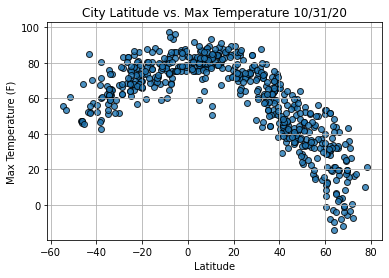

In [56]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

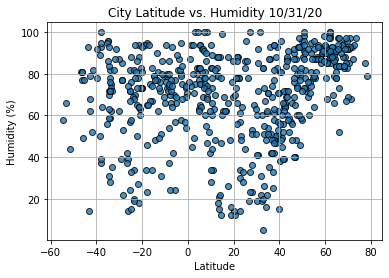

In [57]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

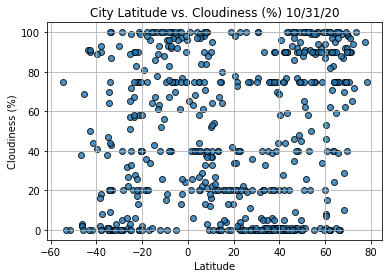

In [58]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

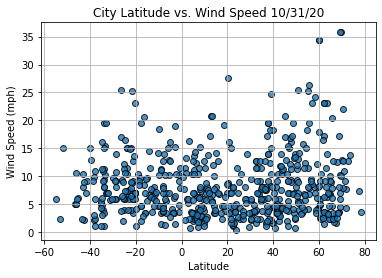

In [59]:
#In a new cell, add the following code and run the cell.

# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [60]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [61]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [62]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Qaanaaq,GL,2020-10-31 17:32:57,77.48,-69.36,10.22,85,95,7.25
2,Lagoa,PT,2020-10-31 17:34:21,39.05,-27.98,68.56,93,70,24.63
3,Tiksi,RU,2020-10-31 17:33:54,71.69,128.87,0.70,93,65,4.36
4,Komsomolskiy,UZ,2020-10-31 17:33:56,40.43,71.72,42.80,38,0,6.93
5,Kudahuvadhoo,MV,2020-10-31 17:36:17,2.67,72.89,83.32,71,40,5.21
...,...,...,...,...,...,...,...,...,...
577,Saryagash,KZ,2020-10-31 17:37:54,41.45,69.17,48.20,39,28,4.70
578,Satun,TH,2020-10-31 17:37:54,6.83,100.00,82.40,100,75,2.95
579,Kattivakkam,IN,2020-10-31 17:37:55,13.22,80.32,78.80,88,20,5.35
580,Lac-Megantic,CA,2020-10-31 17:37:55,45.58,-70.88,37.99,48,0,4.00


In [63]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

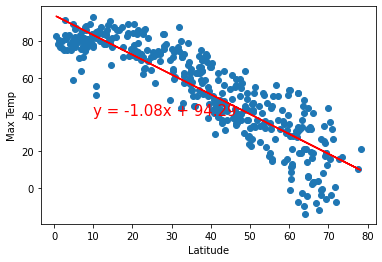

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

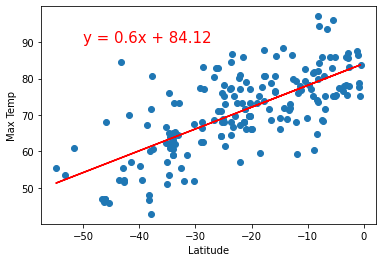

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))


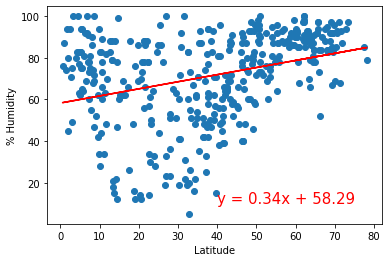

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

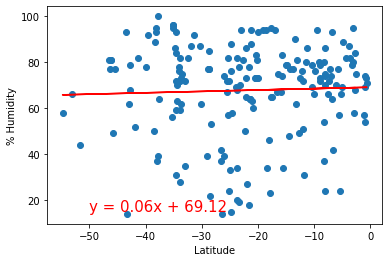

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))


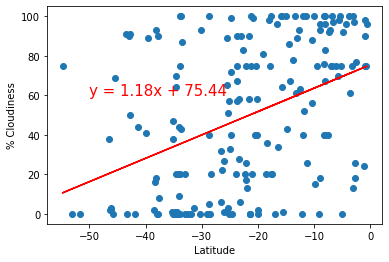

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

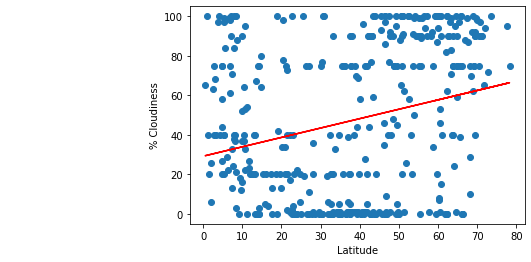

In [74]:
# Linear regression on the northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

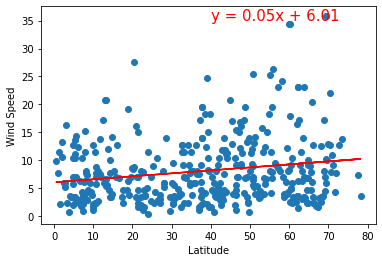

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))


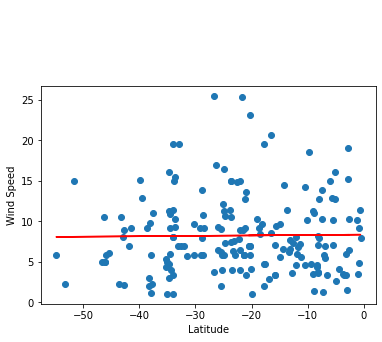

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))